**Load Dataset**

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
from sklearn import datasets
%matplotlib inline

In [30]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


**find the best number of clusters**

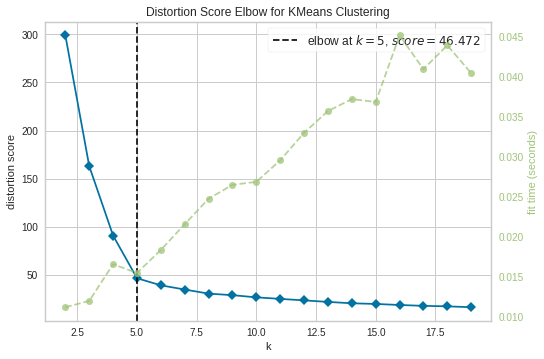

In [41]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer


kmeans = KMeans()
ssd = []
K = range(1, 30)

for k in K:
    kmeans = KMeans(n_clusters=k, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0).fit(df)
    ssd.append(kmeans.inertia_)

kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k=(2, 20))
visu.fit(df)
visu.show()

In [50]:
kmeans = KMeans(n_clusters=5, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0).fit(df)
clusters = kmeans.labels_

df['clusters'] = clusters
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),clusters
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [54]:
df.groupby("clusters").agg({"clusters": "count"})

,clusters
clusters,
0,50
1,12
2,28
3,36
4,24


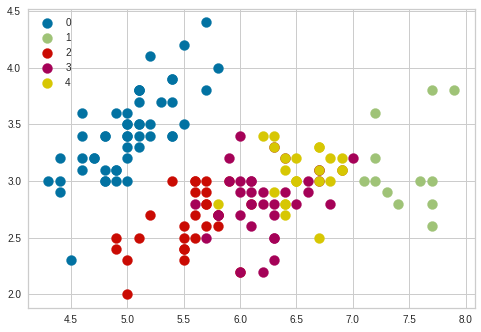

In [57]:
for i in range(5):
  filtered = df[clusters == i]
  plt.scatter(filtered.iloc[:, 0], filtered.iloc[:, 1], label=i, s=100)
plt.legend()